# Data Imputation and Feature Selection in the Worlds Happiness Report


## Data Analyzation

In [94]:
# Loading necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFECV
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2199 non-null   object 
 1   year                              2199 non-null   int64  
 2   Life Ladder                       2199 non-null   float64
 3   Log GDP per capita                2179 non-null   float64
 4   Social support                    2186 non-null   float64
 5   Healthy life expectancy at birth  2145 non-null   float64
 6   Freedom to make life choices      2166 non-null   float64
 7   Generosity                        2126 non-null   float64
 8   Perceptions of corruption         2083 non-null   float64
 9   Positive affect                   2175 non-null   float64
 10  Negative affect                   2183 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 189.1+ KB
None


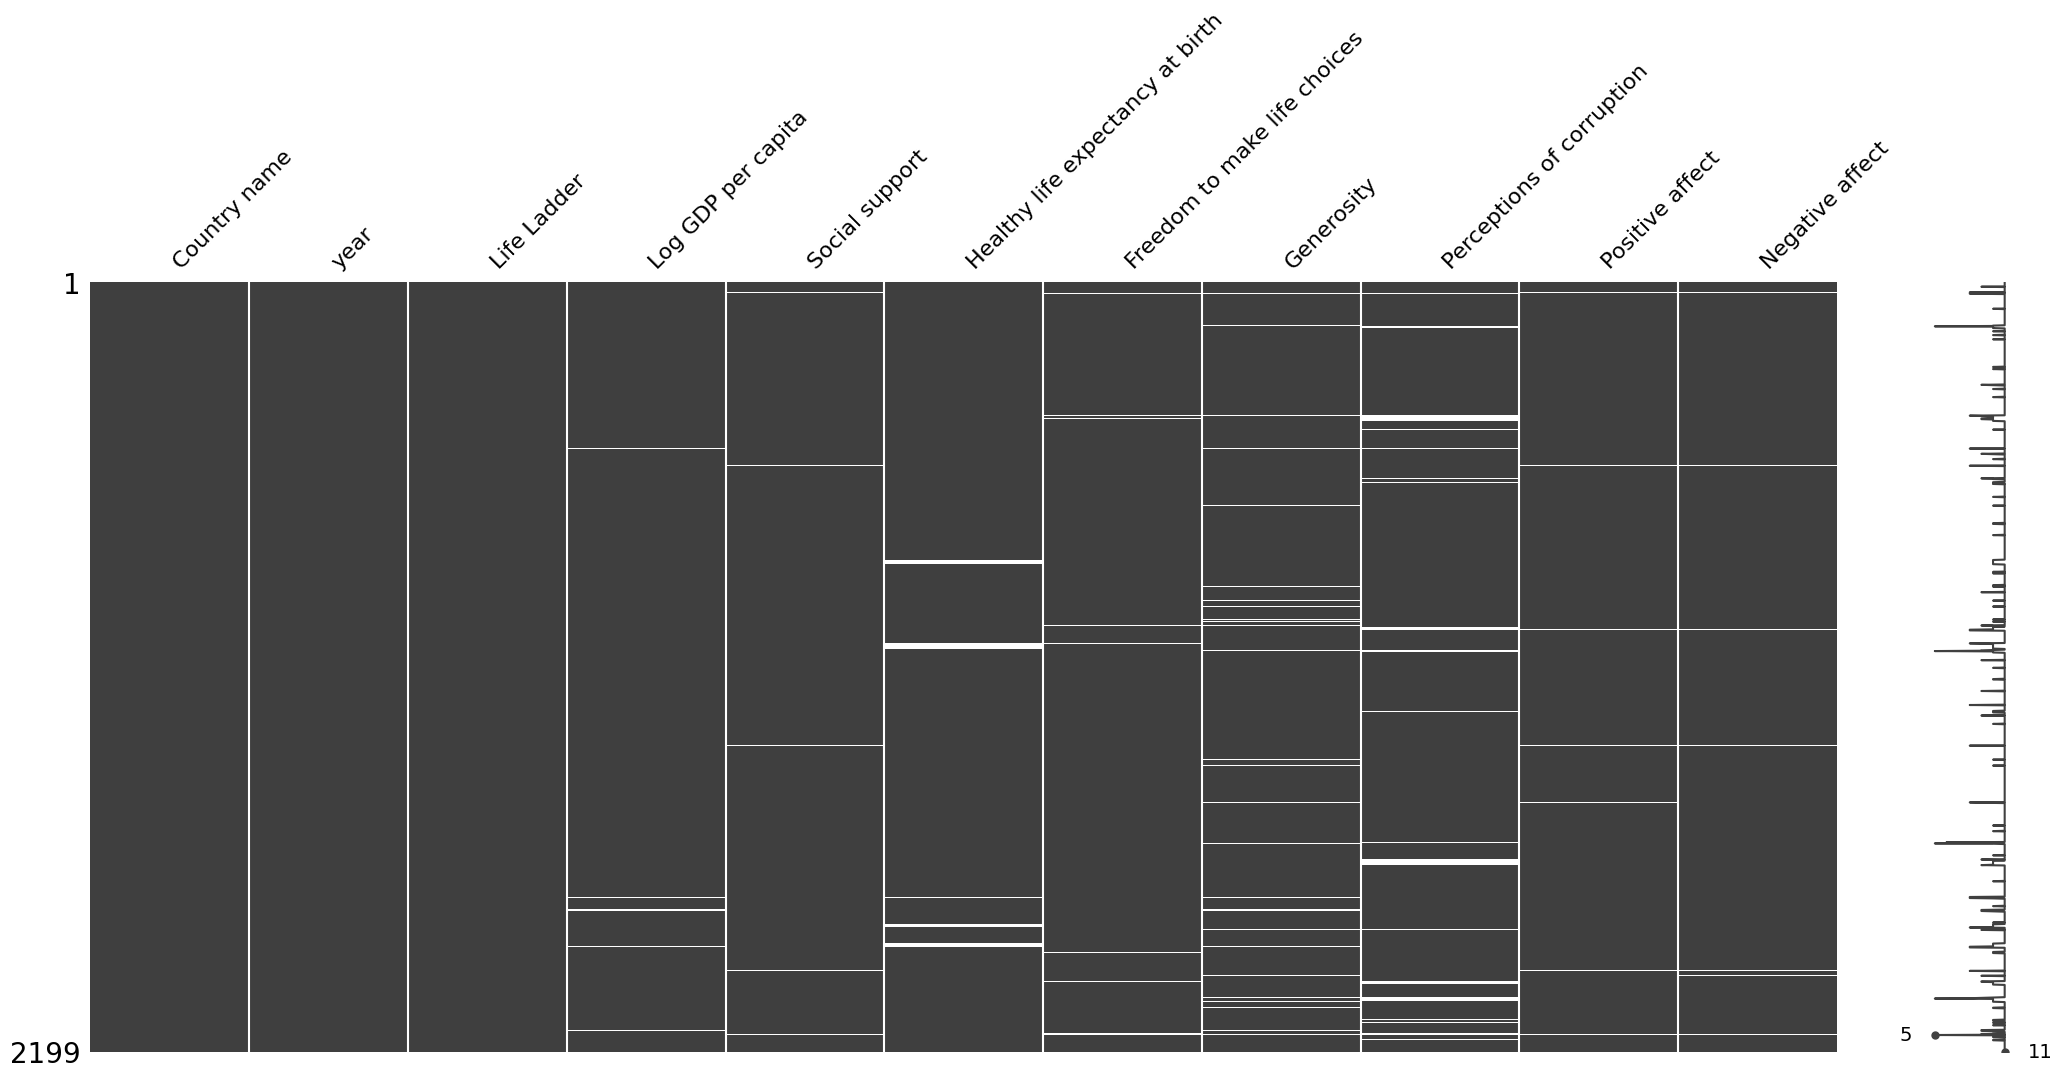

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   20
Social support                       13
Healthy life expectancy at birth     54
Freedom to make life choices         33
Generosity                           73
Perceptions of corruption           116
Positive affect                      24
Negative affect                      16
dtype: int64
Missing values in column: Log GDP per capita


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
13,Afghanistan,2022,1.281271,NaN,0.228217,54.875000,0.368377,NaN,0.733198,0.205868,0.575512
475,Cuba,2006,5.417869,NaN,0.969595,68.000000,0.281458,NaN,NaN,0.596187,0.276602
490,Cyprus,2022,5.864757,NaN,0.819547,73.000000,0.698407,NaN,0.887328,0.659326,0.296999
1031,Kosovo,2007,5.103906,NaN,0.847812,NaN,0.381364,NaN,0.894462,0.613723,0.236699
1237,Malta,2022,6.299238,NaN,0.932083,71.650002,0.837544,NaN,0.757540,0.671104,0.370075
1755,Somaliland region,2009,4.991400,NaN,0.879567,NaN,0.746304,NaN,0.513372,0.707874,0.112012
1756,Somaliland region,2010,4.657363,NaN,0.829005,NaN,0.820182,NaN,0.471094,0.631947,0.083426
1757,Somaliland region,2011,4.930572,NaN,0.787962,NaN,0.858104,NaN,0.357341,0.690514,0.122244
1758,Somaliland region,2012,5.057314,NaN,0.786291,NaN,0.758219,NaN,0.333832,0.686732,0.152428
1792,South Sudan,2014,3.831992,NaN,0.545118,52.880001,0.567259,NaN,0.741541,0.578410,0.428320


Missing values in column: Social support


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
29,Algeria,2010,5.463567,9.306355,NaN,65.500000,0.592696,-0.209753,0.618038,NaN,NaN
126,Bahrain,2014,6.165134,10.801981,NaN,65.959999,NaN,NaN,NaN,NaN,NaN
328,Canada,2007,7.481753,10.733970,NaN,70.620003,0.930341,0.245596,0.405608,0.811577,0.256810
524,Djibouti,2010,5.005811,7.934187,NaN,54.599998,0.763730,-0.068953,0.596910,NaN,NaN
1053,Kuwait,2014,6.180139,10.925643,NaN,70.000000,NaN,NaN,NaN,NaN,NaN
1323,Morocco,2010,4.383247,8.672808,NaN,62.500000,0.662900,-0.159650,0.900453,NaN,NaN
1485,Oman,2011,6.852982,10.538620,NaN,62.340000,0.916293,0.009673,NaN,NaN,0.295164
1599,Qatar,2010,6.849653,11.551208,NaN,64.699997,NaN,0.096500,NaN,NaN,NaN
1602,Qatar,2015,6.374529,11.532454,NaN,66.400002,NaN,NaN,NaN,NaN,NaN
1966,Tunisia,2009,5.025470,9.237887,NaN,66.220001,0.781496,-0.124444,0.722211,NaN,NaN


Missing values in column: Healthy life expectancy at birth


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
793,Hong Kong S.A.R. of China,2006,5.511187,10.746400,0.812178,NaN,0.909820,0.151303,0.355985,0.591140,0.235955
794,Hong Kong S.A.R. of China,2008,5.137262,10.815522,0.840222,NaN,0.922211,0.291946,0.273945,0.575073,0.236634
795,Hong Kong S.A.R. of China,2009,5.397056,10.788470,0.834716,NaN,0.918026,0.303338,0.272125,0.606459,0.210104
796,Hong Kong S.A.R. of China,2010,5.642835,10.846611,0.857314,NaN,0.890418,0.327606,0.255775,0.600561,0.183106
797,Hong Kong S.A.R. of China,2011,5.474011,10.886909,0.846060,NaN,0.894330,0.230172,0.244887,0.582491,0.195712
798,Hong Kong S.A.R. of China,2012,5.483765,10.892731,0.826426,NaN,0.879752,0.218014,0.379783,0.580223,0.183349
799,Hong Kong S.A.R. of China,2014,5.458051,10.939480,0.833558,NaN,0.843082,0.219372,0.422960,0.602495,0.242868
800,Hong Kong S.A.R. of China,2016,5.498421,10.969893,0.832078,NaN,0.799743,0.095778,0.402813,0.568555,0.213115
801,Hong Kong S.A.R. of China,2017,5.362475,10.999467,0.831066,NaN,0.830657,0.135592,0.415810,0.535812,0.200593
802,Hong Kong S.A.R. of China,2019,5.659317,10.995218,0.855826,NaN,0.726852,0.063232,0.431974,0.519312,0.357607


Missing values in column: Freedom to make life choices


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
32,Algeria,2014,6.354898,9.355415,0.818189,65.900002,NaN,NaN,NaN,0.558359,0.176866
33,Algeria,2016,5.340854,9.383312,0.748588,66.099998,NaN,NaN,NaN,0.565026,0.377112
126,Bahrain,2014,6.165134,10.801981,NaN,65.959999,NaN,NaN,NaN,NaN,NaN
293,Cambodia,2006,3.568745,7.746443,0.793081,57.639999,NaN,0.253480,0.829181,NaN,0.341023
381,China,2006,4.560495,8.696139,0.747011,65.660004,NaN,NaN,NaN,0.657659,0.169580
382,China,2007,4.862862,8.823968,0.810852,65.919998,NaN,-0.178883,NaN,0.663977,0.158614
389,China,2014,5.195619,9.380201,0.820366,67.739998,NaN,-0.219485,NaN,0.709763,0.111518
390,China,2015,5.303878,9.442431,0.793734,68.000000,NaN,-0.247149,NaN,0.666827,0.171315
391,China,2016,5.324956,9.502946,0.741703,68.125000,NaN,-0.230264,NaN,0.683256,0.145625
562,Egypt,2008,4.631741,9.134907,0.738364,61.580002,NaN,-0.086289,0.913642,0.627448,0.301018


Missing values in column: Generosity


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
13,Afghanistan,2022,1.281271,NaN,0.228217,54.875000,0.368377,NaN,0.733198,0.205868,0.575512
32,Algeria,2014,6.354898,9.355415,0.818189,65.900002,NaN,NaN,NaN,0.558359,0.176866
33,Algeria,2016,5.340854,9.383312,0.748588,66.099998,NaN,NaN,NaN,0.565026,0.377112
76,Australia,2005,7.340688,10.662058,0.967892,69.800003,0.934973,NaN,0.390416,0.769770,0.238012
124,Bahrain,2012,5.027187,10.774646,0.911350,65.480003,0.681823,NaN,0.437915,0.559416,0.380815
...,...,...,...,...,...,...,...,...,...,...,...
2121,Venezuela,2005,7.169621,9.316229,0.955278,65.500000,0.838198,NaN,0.719800,0.802929,0.233014
2135,Venezuela,2020,4.573830,NaN,0.805224,64.224998,0.611815,NaN,0.811319,0.689349,0.396250
2136,Venezuela,2021,5.107553,NaN,0.812418,64.050003,0.595620,NaN,0.823898,0.697587,0.389351
2137,Venezuela,2022,5.948992,NaN,0.899366,63.875000,0.770417,NaN,0.798016,0.754337,0.292252


Missing values in column: Perceptions of corruption


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
32,Algeria,2014,6.354898,9.355415,0.818189,65.900002,NaN,NaN,NaN,0.558359,0.176866
33,Algeria,2016,5.340854,9.383312,0.748588,66.099998,NaN,NaN,NaN,0.565026,0.377112
126,Bahrain,2014,6.165134,10.801981,NaN,65.959999,NaN,NaN,NaN,NaN,NaN
127,Bahrain,2015,6.007375,10.788364,0.852551,66.199997,0.849521,0.107500,NaN,0.653345,0.302972
128,Bahrain,2016,6.169673,10.789037,0.862700,66.125000,0.888691,0.083302,NaN,0.736220,0.283466
...,...,...,...,...,...,...,...,...,...,...,...
2147,Vietnam,2015,5.076315,8.998519,0.848677,64.900002,NaN,0.066410,NaN,0.583119,0.232416
2149,Vietnam,2017,5.175279,9.110596,NaN,65.099998,NaN,NaN,NaN,NaN,NaN
2155,Yemen,2007,4.477133,8.211859,0.824969,58.720001,0.672685,0.009045,NaN,0.523652,0.378784
2163,Yemen,2016,3.825631,7.552322,0.775407,58.174999,0.532964,-0.140766,NaN,0.401007,0.227925


Missing values in column: Positive affect


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
29,Algeria,2010,5.463567,9.306355,NaN,65.500000,0.592696,-0.209753,0.618038,NaN,NaN
126,Bahrain,2014,6.165134,10.801981,NaN,65.959999,NaN,NaN,NaN,NaN,NaN
140,Bangladesh,2014,4.635565,8.323469,0.577065,63.279999,0.735513,-0.111779,0.789375,NaN,0.230678
151,Belarus,2008,5.463332,9.676768,0.903700,61.180000,0.639924,-0.223395,0.696496,NaN,0.245659
293,Cambodia,2006,3.568745,7.746443,0.793081,57.639999,NaN,0.253480,0.829181,NaN,0.341023
294,Cambodia,2007,4.155971,7.826252,0.675132,57.980000,0.818700,0.113904,0.878508,NaN,0.320335
524,Djibouti,2010,5.005811,7.934187,NaN,54.599998,0.763730,-0.068953,0.596910,NaN,NaN
885,Iraq,2013,4.725017,9.159455,0.728285,60.840000,NaN,-0.044170,0.709726,NaN,0.554279
981,Jordan,2007,5.598057,9.308221,0.840607,66.160004,0.646079,-0.114134,0.663645,NaN,0.239750
992,Jordan,2018,4.638934,9.167903,0.799544,67.599998,0.762420,-0.186800,NaN,NaN,NaN


Missing values in column: Negative affect


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
29,Algeria,2010,5.463567,9.306355,NaN,65.500000,0.592696,-0.209753,0.618038,NaN,NaN
126,Bahrain,2014,6.165134,10.801981,NaN,65.959999,NaN,NaN,NaN,NaN,NaN
524,Djibouti,2010,5.005811,7.934187,NaN,54.599998,0.763730,-0.068953,0.596910,NaN,NaN
992,Jordan,2018,4.638934,9.167903,0.799544,67.599998,0.762420,-0.186800,NaN,NaN,NaN
993,Jordan,2019,4.452548,9.164418,0.792560,67.599998,0.725756,-0.165088,NaN,NaN,NaN
994,Jordan,2020,4.093992,9.127326,0.708840,67.599998,0.778533,-0.151104,NaN,NaN,NaN
1053,Kuwait,2014,6.180139,10.925643,NaN,70.000000,NaN,NaN,NaN,NaN,NaN
1207,Maldives,2018,5.197575,9.892906,0.913315,69.775002,0.854759,0.015678,NaN,NaN,NaN
1323,Morocco,2010,4.383247,8.672808,NaN,62.500000,0.662900,-0.159650,0.900453,NaN,NaN
1551,Philippines,2006,4.669946,8.561695,0.795313,61.360001,0.828273,0.060996,0.841299,0.755979,NaN


In [10]:
#Loading the data
path = '/Users/yerdenovagulnaz/Downloads/DataForTable2.1WHR2023.xls'
df_analyze = pd.read_excel(path)

#Understanding the nature of the data
print(df_analyze.info())
df_analyze.head()


# Visualize missing data
msno.matrix(df_analyze)
plt.show()

# Null values 
print(df_analyze.isnull().sum())

#Displaying the missing values for further analysis
for column in df_analyze.columns:
    if df_analyze[column].isnull().sum() > 0:
        print(f"Missing values in column: {column}")
        display(df_analyze[df_analyze[column].isnull()])


Analyzing the missing values 

After analyzing the missing values in the dataset, several patterns emerged regarding the nature of the missing data:

GDP Data: The GDP values are not missing at random (MNAR). The absence of data is mainly due to political and regional issues. For instance, GDP data is missing for disputed regions such as Taiwan and the State of Palestine, as well as areas affected by conflict, like South Sudan. This suggests that the lack of data stems from the impossibility of obtaining it due to these unique circumstances.

Social Support: Missing values for social support are typically isolated to specific countries and only for one or two years. Since cultural factors, such as generosity and community support, tend to be relatively stable over short periods, it is reasonable to use data from the previous year for imputation.

Healthy Life Expectancy at Birth: Similar to GDP, the missing values for healthy life expectancy are also MNAR. These values are predominantly absent for regions with partial diplomatic recognition, such as Taiwan Province of China or Kosovo. The data's absence likely reflects the difficulties in obtaining consistent health data in these regions.

Freedom to Make Life Choices: The missing data for freedom to make life choices is primarily concentrated in countries with severely restricted freedoms, such as China or Tajikistan. This suggests that the absence of data correlates with the degree of freedom and transparency within the country.

Overall Imputation Feasibility: For most other variables, the missing values appear to be MNAR as well. Importantly, from 2005 to 2022, the dataset contains relatively few instances where a variable is missing entirely, which is favorable for imputation efforts. This suggests that we can reasonably impute missing values using existing data trends, thereby maintaining the integrity of the dataset for further analysis. Visualization of missing data instances using missingno also did not show any discernable patterns.



## Imputation

### Mean Imputation

In [17]:
# Make a copy of the dataset
df_analyze_1 = df_analyze.copy()

# Mean imputation
def mean_imputation(df_analyze_1):
    return df_analyze_1.apply(lambda x: x.fillna(x.mean()) if x.dtype in ['float64', 'int64'] else x)

df_mean_imputed = mean_imputation(df_analyze_1)

print("\nMean Imputed Data:")
df_mean_imputed



Mean Imputed Data:


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919
...,...,...,...,...,...,...,...,...,...,...,...
2194,Zimbabwe,2018,3.616480,7.783066,0.775388,52.625000,0.762675,-0.051219,0.844209,0.657524,0.211726
2195,Zimbabwe,2019,2.693523,7.697755,0.759162,53.099998,0.631908,-0.047464,0.830652,0.658434,0.235354
2196,Zimbabwe,2020,3.159802,7.596050,0.717243,53.575001,0.643303,0.006313,0.788523,0.660658,0.345736
2197,Zimbabwe,2021,3.154578,7.656878,0.685151,54.049999,0.667636,-0.075575,0.756945,0.609917,0.241682


In [19]:
# Print descriptive statistics
print("Original Data Description:")
print(df_analyze.describe())

# Print descriptive statistics after mean imputation
print("\nMean Imputed Data Description:")
print(df_mean_imputed.describe())

Original Data Description:
              year  Life Ladder  Log GDP per capita  Social support  \
count  2199.000000  2199.000000         2179.000000     2186.000000   
mean   2014.161437     5.479226            9.389766        0.810679   
std       4.718736     1.125529            1.153387        0.120952   
min    2005.000000     1.281271            5.526723        0.228217   
25%    2010.000000     4.646750            8.499764        0.746609   
50%    2014.000000     5.432437            9.498955        0.835535   
75%    2018.000000     6.309460           10.373216        0.904792   
max    2022.000000     8.018934           11.663788        0.987343   

       Healthy life expectancy at birth  Freedom to make life choices  \
count                       2145.000000                   2166.000000   
mean                          63.294583                      0.747858   
std                            6.901104                      0.140150   
min                            6.720000  

In [21]:
# Model comparison on mean-imputed data
X_mean = df_mean_imputed.drop(columns=['Life Ladder', 'Country name'])
y_mean = df_mean_imputed['Life Ladder']

X_train_mean, X_test_mean, y_train_mean, y_test_mean = train_test_split(X_mean, y_mean, test_size=0.2, random_state=0)

model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train_mean, y_train_mean)
y_pred_mean = model.predict(X_test_mean)


print("\nMean imputed data R^2:", r2_score(y_test_mean, y_pred_mean))
print("Mean imputed data RMSE:", np.sqrt(mean_squared_error(y_test_mean, y_pred_mean)))



Mean imputed data R^2: 0.847007177826038
Mean imputed data RMSE: 0.4136132206044973


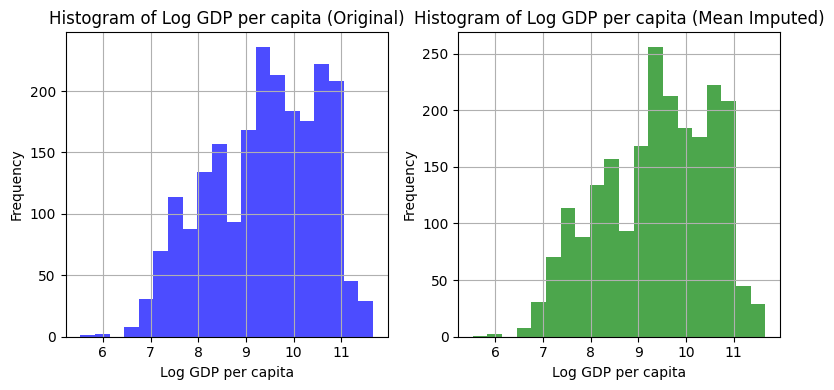

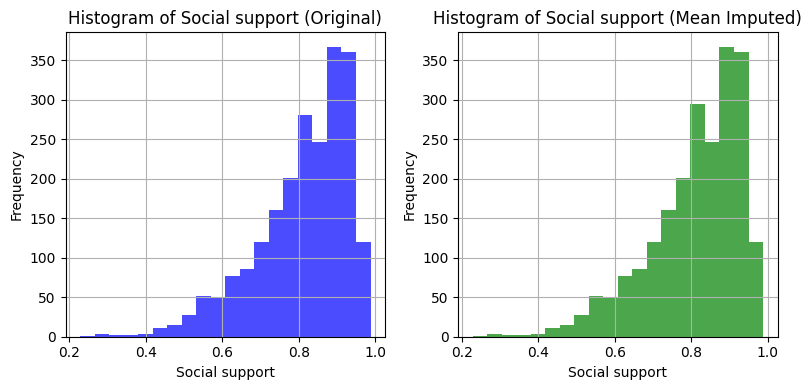

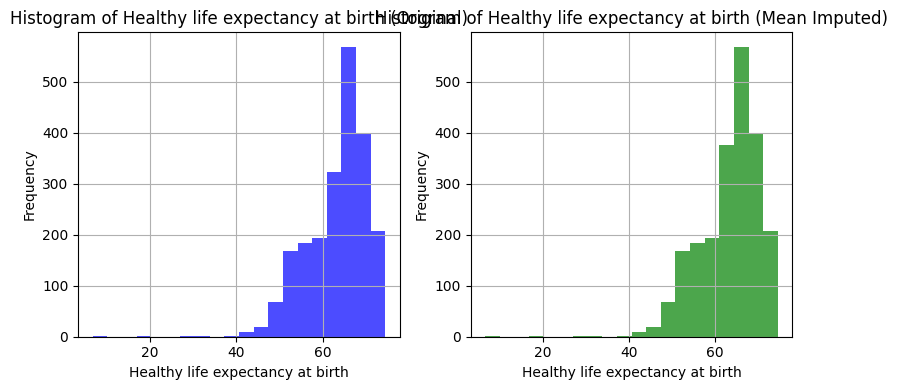

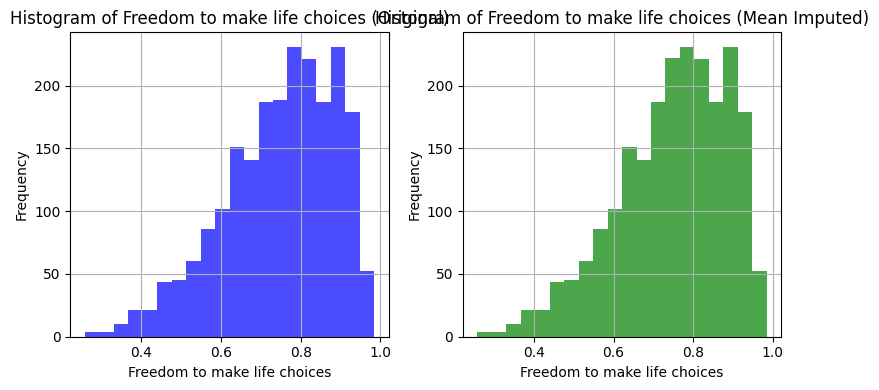

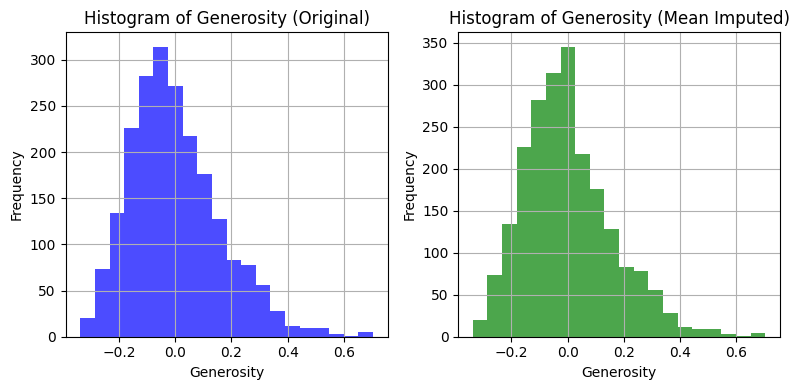

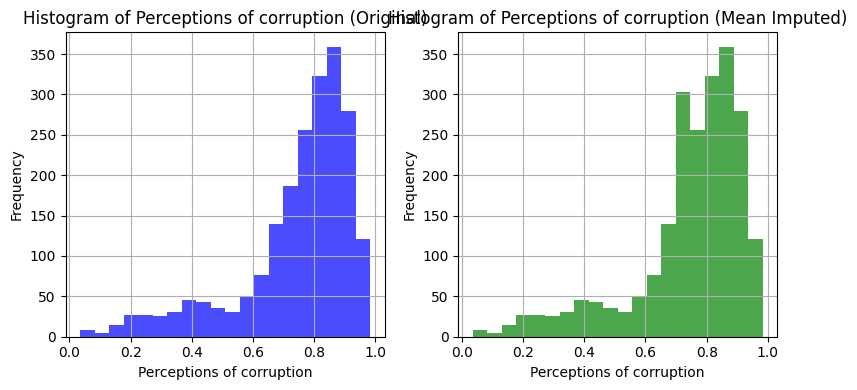

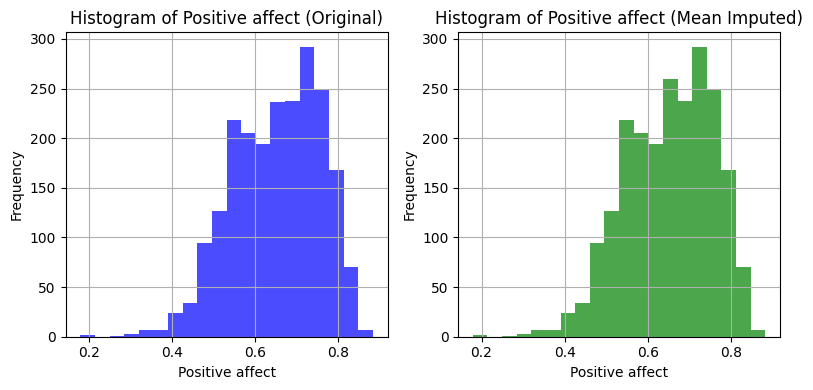

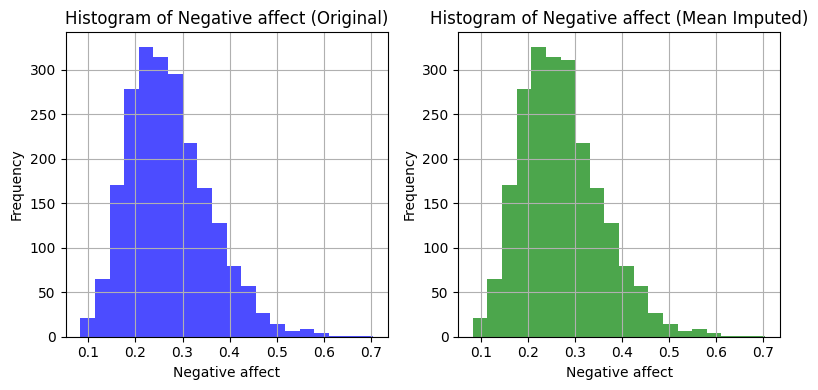

In [25]:
# Visualizing the dataset before and after mean imputation 
# Plot histograms for each column that had missing values

# Identify columns with missing values
columns_with_missing = ['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices',  
                        'Generosity', 'Perceptions of corruption','Positive affect', 'Negative affect']

for column in columns_with_missing:
    plt.figure(figsize=(8, 4))
    
    # Original data histogram
    plt.subplot(1, 2, 1)
    plt.hist(df_analyze[column].dropna(), bins=20, color='blue', alpha=0.7)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column} (Original)')
    plt.grid(True)
    
    # Mean imputed data histogram
    plt.subplot(1, 2, 2)
    plt.hist(df_mean_imputed[column], bins=20, color='green', alpha=0.7)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column} (Mean Imputed)')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()


### Random Forest Imputation

In [30]:
# Make a copy of the dataset
df_reg_imputed = df_analyze.copy()

# Initialize IterativeImputer with a model 
imputer = IterativeImputer(estimator=RandomForestRegressor(), random_state=0)

# Fit and transform the data with IterativeImputer
imputed_data = imputer.fit_transform(df_reg_imputed[columns_with_missing])

# Convert imputed_data back to DataFrame
df_reg_imputed = pd.DataFrame(imputed_data, columns=columns_with_missing)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [32]:
# Print descriptive statistics
print("Original Data Description:")
print(df_analyze.describe())

# Print descriptive statistics after mean imputation
print("\nMean Imputed Data Description:")
print(df_reg_imputed.describe())

Original Data Description:
              year  Life Ladder  Log GDP per capita  Social support  \
count  2199.000000  2199.000000         2179.000000     2186.000000   
mean   2014.161437     5.479226            9.389766        0.810679   
std       4.718736     1.125529            1.153387        0.120952   
min    2005.000000     1.281271            5.526723        0.228217   
25%    2010.000000     4.646750            8.499764        0.746609   
50%    2014.000000     5.432437            9.498955        0.835535   
75%    2018.000000     6.309460           10.373216        0.904792   
max    2022.000000     8.018934           11.663788        0.987343   

       Healthy life expectancy at birth  Freedom to make life choices  \
count                       2145.000000                   2166.000000   
mean                          63.294583                      0.747858   
std                            6.901104                      0.140150   
min                            6.720000  

In [34]:
# Model comparison on RandomForestRegressor-imputed data
X_reg = df_reg_imputed
y_reg = df_analyze['Life Ladder']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=0)

model_reg = RandomForestRegressor(n_estimators=100, random_state=0)
model_reg.fit(X_train_reg, y_train_reg)
y_pred_reg = model_reg.predict(X_test_reg)

print("\nReg imputed data R^2:", r2_score(y_test_reg, y_pred_reg))
print("Reg imputed data RMSE:", np.sqrt(mean_squared_error(y_test_reg, y_pred_reg)))




Reg imputed data R^2: 0.8424440102111017
Reg imputed data RMSE: 0.41973611957851714


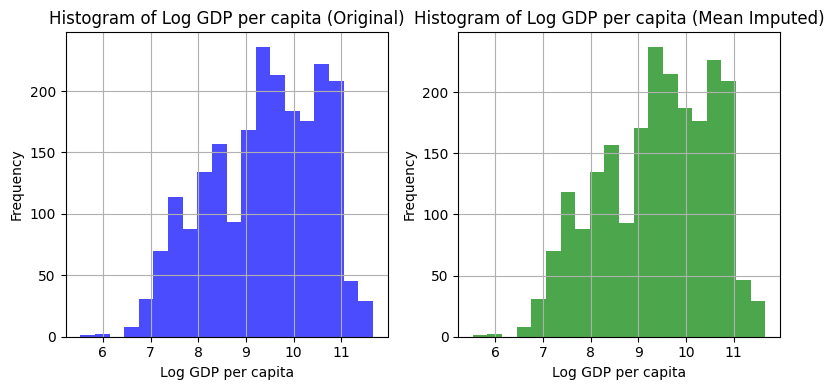

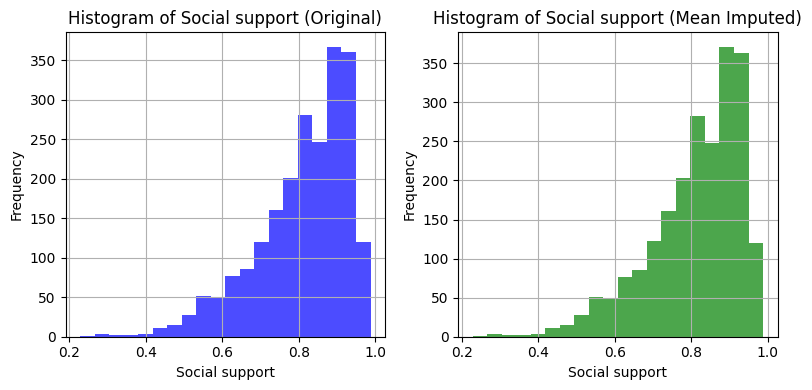

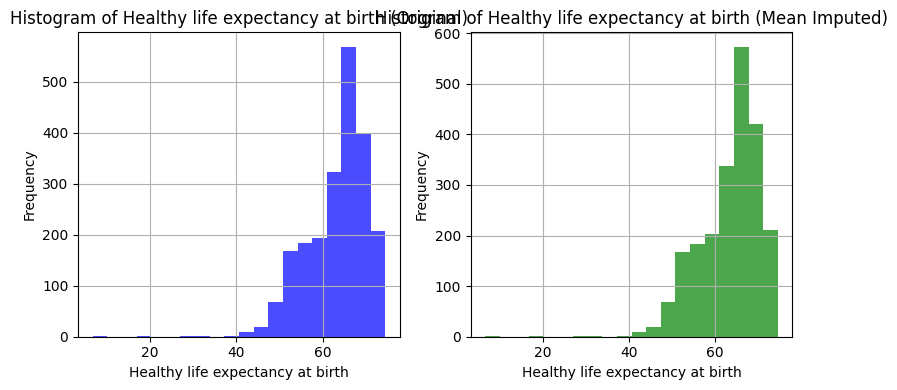

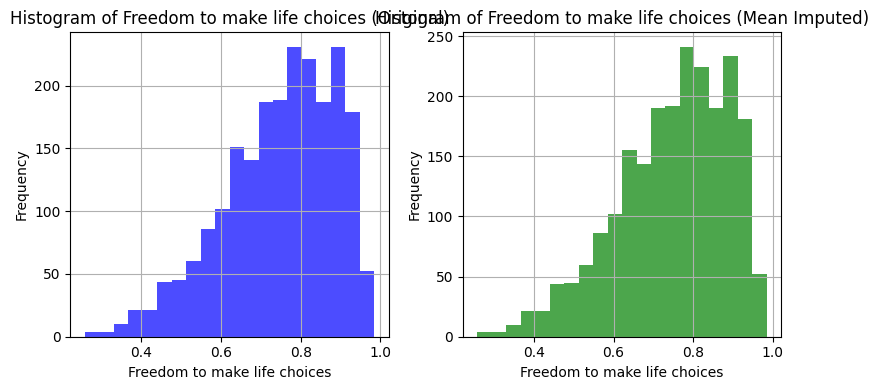

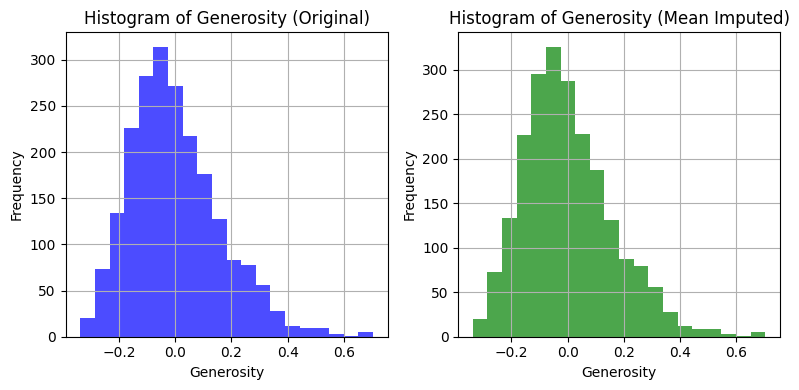

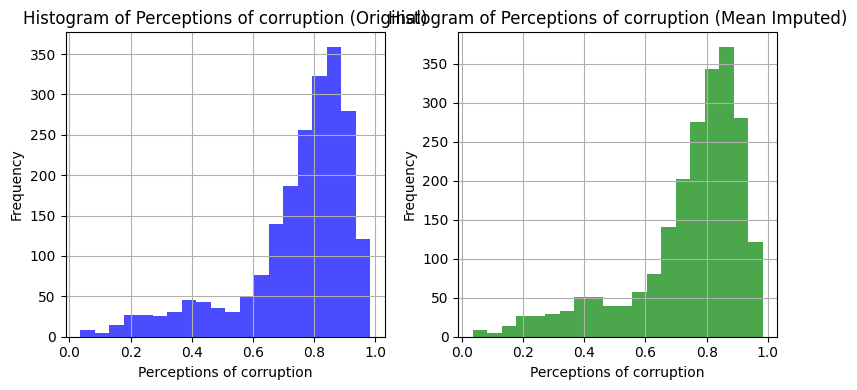

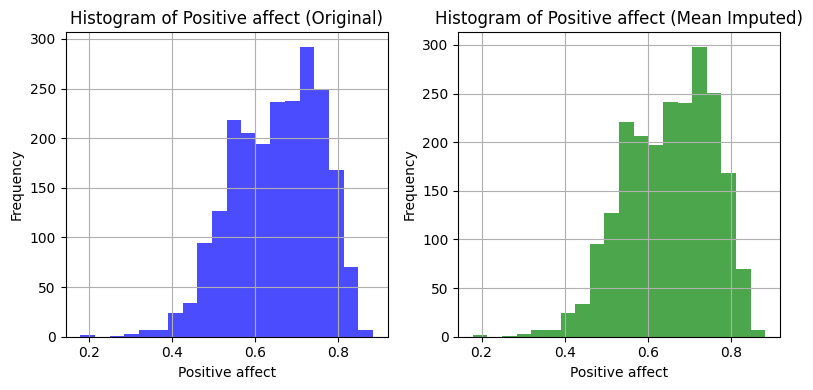

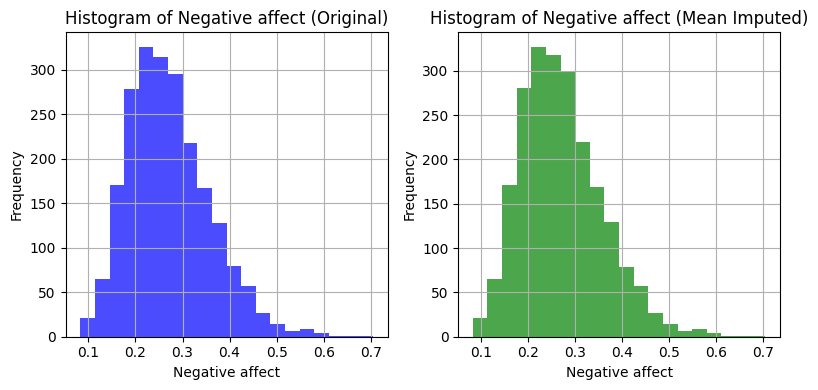

In [36]:
# Visualizing the dataset before and after random forest imputation 
# Plot histograms for each column that had missing values
for column in columns_with_missing:
    plt.figure(figsize=(8, 4))
    
    # Original data histogram
    plt.subplot(1, 2, 1)
    plt.hist(df_analyze[column].dropna(), bins=20, color='blue', alpha=0.7)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column} (Original)')
    plt.grid(True)
    
    # Random Forest imputed data histogram
    plt.subplot(1, 2, 2)
    plt.hist(df_reg_imputed[column], bins=20, color='green', alpha=0.7)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column} (Mean Imputed)')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

## Feature Selection

### RFECV

In [82]:
# Split data into features and target
X = df_reg_imputed
y = df_analyze['Life Ladder']

# Initialize RFECV with RandomForestRegressor as the estimator
estimator = RandomForestRegressor(random_state=0)

# RFECV setup with RandomForestRegressor for regression tasks
rfe_cv = RFECV(estimator, step=1, cv=5, scoring='r2')

# Fit RFECV to the data
rfe_cv.fit(X, y)

# Get the selected features
selected_features = X.columns[rfe_cv.support_]

# Print selected features
print("Selected Features:")
print(selected_features)



Selected Features:
Index(['Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Positive affect', 'Negative affect'],
      dtype='object')


In [98]:
# Features and target selection
selected_features = ['Log GDP per capita', 'Social support',
                     'Healthy life expectancy at birth', 'Freedom to make life choices',
                     'Generosity', 'Positive affect', 'Negative affect']
X_selected = X[selected_features]

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Evaluate model performance on validation set
y_pred = model.predict(X_val)

# Calculate MSE and R^2 for evaluation
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"Mean Squared Error on validation set with selected features: {mse:.4f}")
print(f"R^2 Score on validation set with selected features: {r2:.4f}")

Mean Squared Error on validation set with selected features: 0.1958
R^2 Score on validation set with selected features: 0.8324


### Stepside

In [76]:
# Initialize the estimator (RandomForestRegressor for regression)
estimator = RandomForestRegressor(random_state=0)

# Initialize the Sequential Feature Selector
sfs = SequentialFeatureSelector(
    estimator, 
    n_features_to_select='auto',  # 'auto' means it will select the best number of features
    direction='forward',  # 'forward' or 'backward'
    scoring='neg_mean_squared_error',  # Use a regression scoring metric
    cv=5  # 5-fold cross-validation
)

# Fit the Sequential Feature Selector to the data
sfs.fit(X, y)

# Get the selected features
selected_features = X.columns[sfs.get_support()]

# Print the selected features
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['Log GDP per capita', 'Social support', 'Positive affect',
       'Negative affect'],
      dtype='object')


In [102]:
# Features and target selection
selected_features = ['Log GDP per capita', 'Social support', 'Positive affect',
       'Negative affect']
X_selected = X[selected_features]

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Evaluate model performance on validation set
y_pred = model.predict(X_val)

# Calculate MSE and R^2 for evaluation
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"Mean Squared Error on validation set with selected features: {mse:.4f}")
print(f"R^2 Score on validation set with selected features: {r2:.4f}")

Mean Squared Error on validation set with selected features: 0.2349
R^2 Score on validation set with selected features: 0.7990
